In [1]:
import sys
sys.path.append("..")


from libs.data_manipulation import *
from libs.dim_reduction import *
from libs.feature_generation import *
from libs.clustering import *
from libs.convex_hull import *
from libs.alpha_shape import *
from libs.weight_generator import *

/home/martin/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (None)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
england_df = compile_team_tracking_data("../data", "England")
england_df = extract_one_match(england_df).iloc[::48]

In [3]:
print(england_df)

        match_id  Time [s]  Time [s]_team half_team  minute_team  Period_team  \
144516         1      0.00           0.00        1H            0            1   
144564         1      1.92           1.92        1H            0            1   
144612         1      3.84           3.84        1H            0            1   
144660         1      5.76           5.76        1H            0            1   
144708         1      7.68           7.68        1H            0            1   
...          ...       ...            ...       ...          ...          ...   
285684         1   5579.08        5579.08        2H           92            2   
285732         1   5581.00        5581.00        2H           93            2   
285780         1   5582.92        5582.92        2H           93            2   
285828         1   5584.84        5584.84        2H           93            2   
285876         1   5586.76        5586.76        2H           93            2   

         home_6_x   home_6_

In [4]:





inverse_distance_list = calculate_weights(england_df, inverse_weighting) #Inverse proportionality to distance
linear_distance_list = calculate_weights(england_df, linear_weighting) #Linear weigh based upon distance
exp_pow_neg_dist_list = calculate_weights(england_df, inverse_exponential_weighting) #Linear weigh based upon distance

[0.12518127377503432, 0.04502265480590625, 0.07566621453828894, 0.05780687100406944, 0.11308617065568462, 1.6666666666666667, 0.18553016648419568, 0.10909433796642373, 0.1327164117030518, 0.08743439909957261, 0.17951886462256736, 17.32227596867854]
[0.0962312864228324, 0.300294225859178, 0.047735403239500505, 0.04115025206130834, 0.07270497201636492, 0.05844294562841784, 0.08301819132541582, 0.049300494880735984, 0.10860622892599278, 0.06675994119208488, 0.07256945705295947, 19.103186601395212]
[0.08695647363254612, 0.9070878365233234, 0.040046741242519696, 0.03477474477411264, 0.061691234130945, 0.04186858620275517, 0.10082983668278062, 0.038112912543933654, 0.12649503428473488, 0.06074813618612786, 0.05560730936204832, 18.545781154434174]
[0.12332723857410878, 0.04665345278226961, 0.10310228373917571, 0.06923991652120563, 0.08345058707718678, 0.12237328291930769, 0.12111734708969273, 0.09171089788386222, 0.06853829467487305, 0.1342527946054526, 0.5109334183103303, 18.625300485822535]

In [5]:
inverse_distance_flat =  [x for xs in inverse_distance_list for x in xs[:-1]]
linear_distance_flat =  [x for xs in linear_distance_list for x in xs[:-1]]
exp_pow_neg_dist_flat =  [x for xs in exp_pow_neg_dist_list for x in xs[:-1]]

In [6]:

inverse_distance_flat_np = np.array(inverse_distance_flat)
linear_distance_flat_np = np.array(linear_distance_flat)
exp_pow_neg_dist_flat_np = np.array(exp_pow_neg_dist_flat)




inverse_distance_flat_np = inverse_distance_flat_np[~np.isnan(inverse_distance_flat_np)]
linear_distance_flat_np = linear_distance_flat_np[~np.isnan(linear_distance_flat_np)]
exp_pow_neg_dist_flat_np = exp_pow_neg_dist_flat_np[~np.isnan(exp_pow_neg_dist_flat_np)]



0.07218750584177255


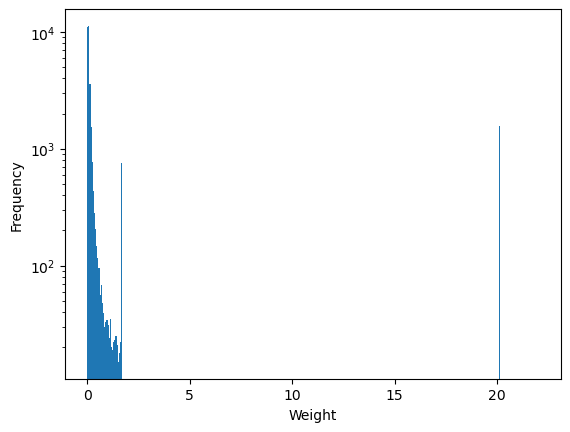

In [7]:


print(np.median(inverse_distance_flat_np))



plt.yscale("log")
plt.ylabel("Frequency")
plt.xlabel("Weight")
plt.hist(inverse_distance_flat_np, bins =np.linspace(0, 22, num= 400))
plt.savefig("inverse_frequencies.png")
plt.show()

14.742664893600015


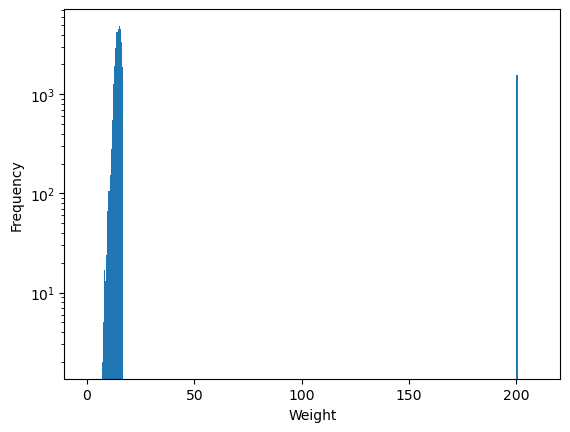

In [8]:
print(np.median(linear_distance_flat_np))



plt.yscale("log")
plt.ylabel("Frequency")
plt.xlabel("Weight")
plt.hist(linear_distance_flat_np, bins =np.linspace(0, 210, num= 400))
plt.savefig("linear_frequencies.png")
plt.show()

0.02627052444130327
0.22929043257269305


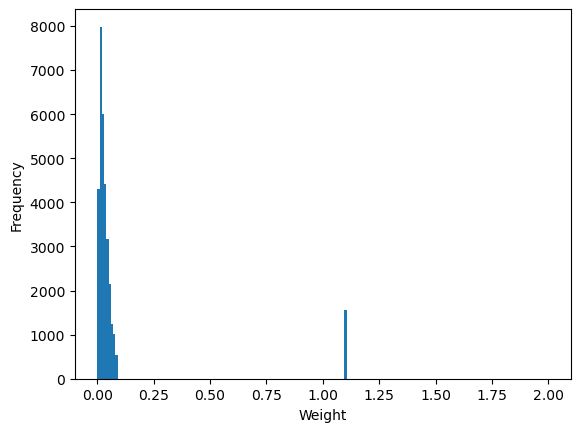

In [10]:
#plt.yscale('log')
print(np.median(exp_pow_neg_dist_flat_np))

plt.ylabel("Frequency")
plt.xlabel("Weight")
plt.hist(exp_pow_neg_dist_flat_np, bins =np.linspace(0, 2, num= 200))
plt.savefig("negative_exponential_frequency.png")
plt.show()